In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
train_values = pd.read_csv('../datasets/train_values.csv')

In [4]:
numero_pisos = train_values[['building_id','count_floors_pre_eq']]

In [5]:
numero_pisos = train_labels.merge(numero_pisos, how='inner').\
 rename(columns={'count_floors_pre_eq':'Número de pisos'})

In [6]:
grado_danio_segun_numero_pisos = numero_pisos.groupby(['Número de pisos','damage_grade'])\
    .agg('count')

In [7]:
grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos.reset_index().\
 pivot(index='Número de pisos', columns='damage_grade',values='building_id').fillna(0)

In [8]:
grado_danio_segun_numero_pisos

damage_grade,1,2,3
Número de pisos,,,
1,"8,969.00","20,798.00","10,674.00"
2,"12,593.00","93,968.00","50,062.00"
3,"2,537.00","28,479.00","24,601.00"
4,707.00,"3,374.00","1,343.00"
5,254.00,"1,481.00",511.00
6,53.00,133.00,23.00
7,10.00,25.00,4.00
8,0.00,1.00,0.00
9,1.00,0.00,0.00


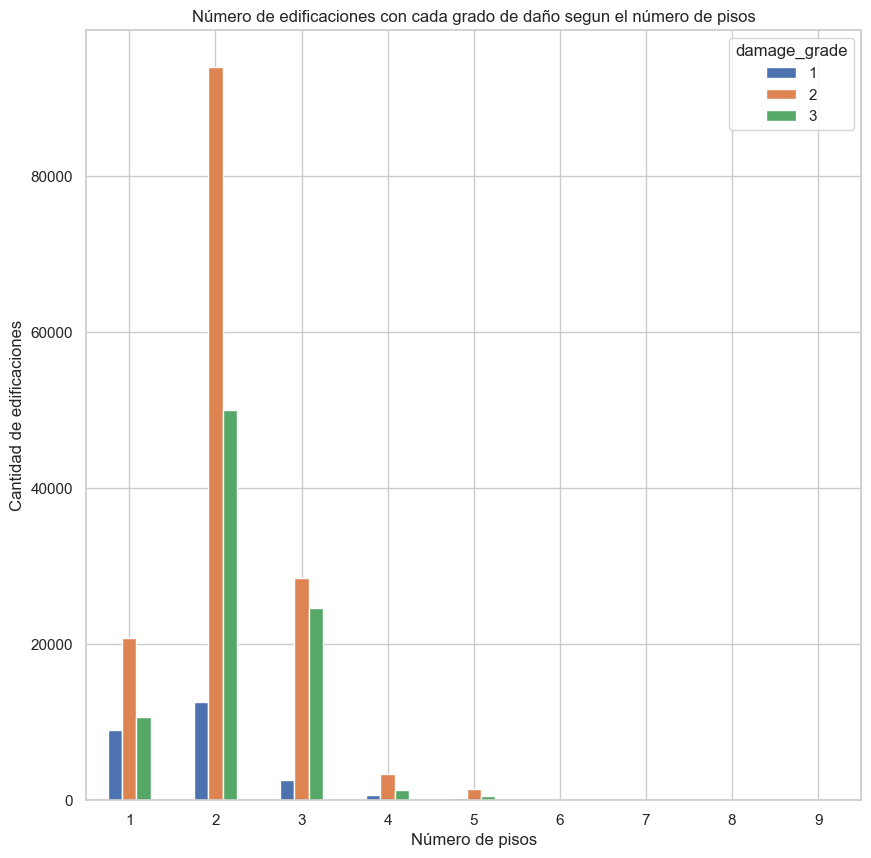

In [9]:
grado_danio_segun_numero_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones con cada grado de daño segun el número de pisos')
ax=plt.gca()
ax.set_xlabel('Número de pisos')
ax.set_ylabel('Cantidad de edificaciones');

Vemos que la gran mayoria de edificaciones en Nepal tienen dos pisos.

Ahora analizaremos los tipos de cimientos usados en las edificaciones de dos pisos

In [10]:
edificaciones_dos_pisos = train_values.loc[(train_values['count_floors_pre_eq']==2),['building_id','foundation_type']]

In [11]:
edificaciones_dos_pisos = train_labels.merge(edificaciones_dos_pisos)

In [12]:
edificaciones_dos_pisos = edificaciones_dos_pisos.groupby(['foundation_type','damage_grade']).count()\
.rename(columns={'building_id':'total_edificaciones'})
edificaciones_dos_pisos

total_edificaciones
foundation_type damage_grade                     
h               1                             124
                2                             333
                3                             333
i               1                            1882
                2                            1534
                3                              66
r               1                            6603
                2                           80937
                3                           47563
u               1                            1323
                2                            3963
                3                            1121
w               1                            2661
                2                            7201
                3                             979

In [13]:
edificaciones_dos_pisos = edificaciones_dos_pisos.reset_index().\
 pivot(index='foundation_type', columns='damage_grade',values='total_edificaciones')
edificaciones_dos_pisos

damage_grade,1,2,3
foundation_type,,,
h,124,333,333
i,1882,1534,66
r,6603,80937,47563
u,1323,3963,1121
w,2661,7201,979


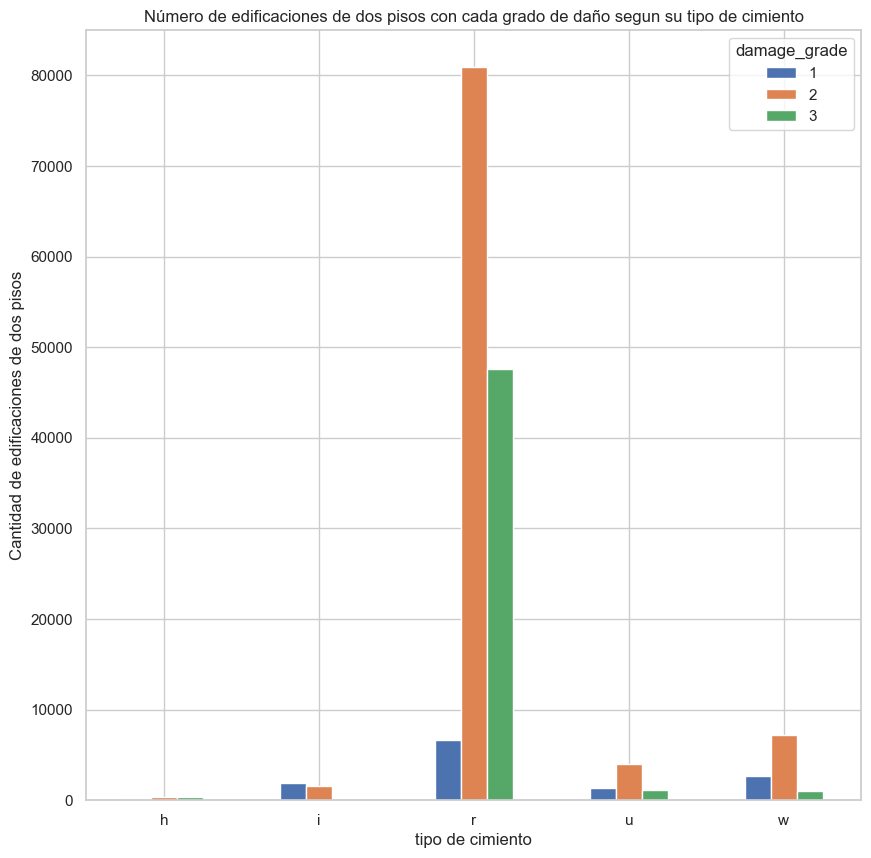

In [14]:
edificaciones_dos_pisos.plot(kind='bar',figsize=(10,10),\
                                    rot=0,title='Número de edificaciones de dos pisos con cada grado de daño segun su tipo de cimiento')
ax=plt.gca()
ax.set_xlabel('tipo de cimiento')
ax.set_ylabel('Cantidad de edificaciones de dos pisos');